<a href="https://colab.research.google.com/github/Vishvesh-Bhardwaj/Machine-Learning-Core-Concepts/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [18]:
Life_Expectancy_Data = pd.read_csv("https://github.com/Vishvesh-Bhardwaj/Machine-Learning-Core-Concepts/raw/main/Life_Expectancy.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()         

lindata = data.copy()
multidata = data.copy()
polydata = data.copy()
RFdata = data.copy()
logdata = data.copy()

In [20]:
lindata.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [21]:
lindata.corr()

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
Adult_Mortality,1.000000,0.174750,-0.077200,0.118974,-0.355814,0.204293,-0.274509,-0.198470,0.467842,-0.312615,0.100014,0.245312,0.275346,-0.556288,-0.535451,-0.710868
Infant_Deaths,0.174750,1.000000,-0.110263,0.853491,-0.209076,0.993025,-0.172839,-0.153746,0.088694,-0.122646,0.021376,0.458212,0.465814,-0.188871,-0.204735,-0.217233
Hepatitis,-0.077200,-0.110263,1.000000,-0.080287,0.073414,-0.133391,0.528549,0.861083,-0.006690,0.066292,0.042752,0.056605,-0.036140,0.157868,0.230894,0.181308
Measles,0.118974,0.853491,-0.080287,1.000000,-0.152164,0.844227,-0.110997,-0.113898,0.008327,-0.090549,0.022807,0.266472,0.337964,-0.081941,-0.109691,-0.125452
BMI,-0.355814,-0.209076,0.073414,-0.152164,1.000000,-0.225075,0.296805,0.162938,-0.437901,0.389806,0.166865,-0.471861,-0.504309,0.698706,0.667440,0.539188
Underfive_Deaths,0.204293,0.993025,-0.133391,0.844227,-0.225075,1.000000,-0.197981,-0.181364,0.124859,-0.128080,0.012139,0.429686,0.439807,-0.217214,-0.232114,-0.251527
Polio,-0.274509,-0.172839,0.528549,-0.110997,0.296805,-0.197981,1.000000,0.642188,-0.082841,0.159077,-0.121309,-0.225484,-0.256457,0.364917,0.381725,0.331566
Diphtheria,-0.198470,-0.153746,0.861083,-0.113898,0.162938,-0.181364,0.642188,1.000000,-0.079025,0.156255,0.041571,-0.033914,-0.139628,0.314269,0.378826,0.293787
HIV,0.467842,0.088694,-0.006690,0.008327,-0.437901,0.124859,-0.082841,-0.079025,1.000000,-0.226209,-0.124122,0.245843,0.228223,-0.645433,-0.574676,-0.678452
GDP,-0.312615,-0.122646,0.066292,-0.090549,0.389806,-0.128080,0.159077,0.156255,-0.226209,1.000000,0.042159,-0.259829,-0.279711,0.497790,0.494728,0.463379


In [22]:
linear_reg = LinearRegression()
x = lindata.GDP.values.reshape(-1,1)
y = lindata['Expected'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

y = b0 + b1*x is our linear regression model.


In [23]:
b0 = linear_reg.predict(([[10000]]))       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[72.35040173]]
b1:  [[0.00036047]]


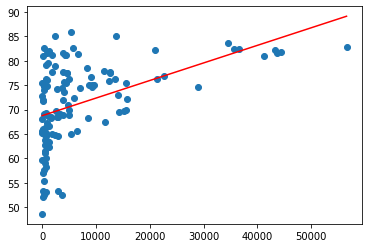

Mean Absolute Error:  28200.800468488014
Mean Squared Error:  1061571478.2087611
Root Mean Squared Error:  32581.766038825474


In [24]:
x_array = np.arange(min(lindata.GDP),max(lindata.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [25]:
print(r2_score(y, linear_reg.predict(x)))

0.21471997668675868


The conclusion here is: the estimate made has 21 % accuracy.

In [28]:
# Make a prediction for a single input
sample_input = [10000]
prediction = linear_reg.predict([sample_input])

# Print the prediction
print('The predicted life expectancy for the input is:', prediction[0])

The predicted life expectancy for the input is: [72.35040173]
